# Introduction: 
    Have you ever wondered what it would look like to get the facial expressing of your customers, yes, it will help you see how they feel after buying. That is the purpose of our project

## PART 1

### 1.SETUP AND LOAD DATA

#### 1.1 Install Dependencies amd setup

In [1]:
!pip install tensorflow==2.10.1 tensorflow-gpu==2.10.1 opencv-python matplotlib

In [2]:
# !pip install tensorflow tensorflow-gpu opencv-python matplotlib


### TO SEE THE LIST of our installation

In [3]:
#lets see if our installation for tensorflow and tensor sflow GPU was successfully installed
# !pip list

### we compress our GPU

     import dependencies
         * OS is used to navigate file structures

In [4]:
import tensorflow as tf
import os

    we want to limit the number of 

In [5]:
gpus = tf.config.experimental.list_physical_devices('cpu')
len(gpus)

0

In [6]:
gpus = tf.config.experimental.list_physical_devices('GPU')  #grab all the gpus in our machine
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

    ##### Download all images is an extension that will help ou to downLOAD AS many images as possible

####  1.2 Remove Dodgy images:
    these are images that may nor have the right file extension, 
    or might be corrupt
    OR HAVE INCORRECT extension

In [7]:
#we will use opencv and imagedhr
import cv2 # its helps us to do a computer vision stuff, its from open cv
import imghdr #for checking file extension

In [8]:
data_dir = r'C:\Users\test\OneDrive\Desktop\datascience_complete\DEEP-LEARNING\data'  #create a variable to hold our data directory. it points to data
#we are setting this so that we can loop throup it.

In [9]:
#os.listdir(os.path.join(data_dir, "happy")) ///we are checking the things inside our folder

In [10]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']  #these are the file extensions we want to allow


In [11]:
# import matplotlib.pyplot as plt
# imag = cv2.imread(os.path.join(data_dir, 'happy','happy.jpg'))  #this is simple how to join path
# imag.shape

In [12]:

# plt.imshow(cv2.cvtColor(imag, cv2.COLOR_BGR2RGB))
# plt.show()

In [13]:
for image_class in os.listdir(data_dir): #we are looping through every folder in data folder
    for image in os.listdir(os.path.join(data_dir, image_class)): #we go through all images neach folder
        image_path = os.path.join(data_dir, image_class, image) #we go through the data directory, tgen the image folder(happy or sa) then we go through each image.
        try:
            img = cv2.imread(image_path)  #  we check that we can load the image into the opencv, is it a valid image?
            tip = imghdr.what(image_path)  #and we check that the image paches the image extention passed in  "image_exts" given above
            if tip not in image_exts:  #if we don't match the n we format
                print('Image not in ext list{}'.format(image_path))
                os.remove(image_path) #then we emove it from the list
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            
    

#### 1.3Load our data

In [14]:
# tf.data.Dataset??


In [15]:
import numpy as np
from matplotlib import pyplot as plt

In [16]:
data = tf.keras.utils.image_dataset_from_directory(r'C:\Users\test\OneDrive\Desktop\datascience_complete\DEEP-LEARNING\data') #builds our data pipeline, also reshapes our images to make them consistence in size


Found 186 files belonging to 2 classes.


In [17]:
#lets look at the data itself since we have passed it to a variable called data, and create it as an interator.
data_iterator = data.as_numpy_iterator() #allow us to access our data pipeline

In [18]:
# to get a catch back
batch = data_iterator.next() #assessing the data pipeline itself, and goes to the next batch

In [19]:
#images represented as numoy arrays
#Class 1 = sad people, Class 0 = happy people
batch[0].shape

(32, 256, 256, 3)

In [20]:
#for labels
batch[1]  #this means 1 is eiter gonna represent happy or sad, 0 is either gonna represent happy or sad

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0])

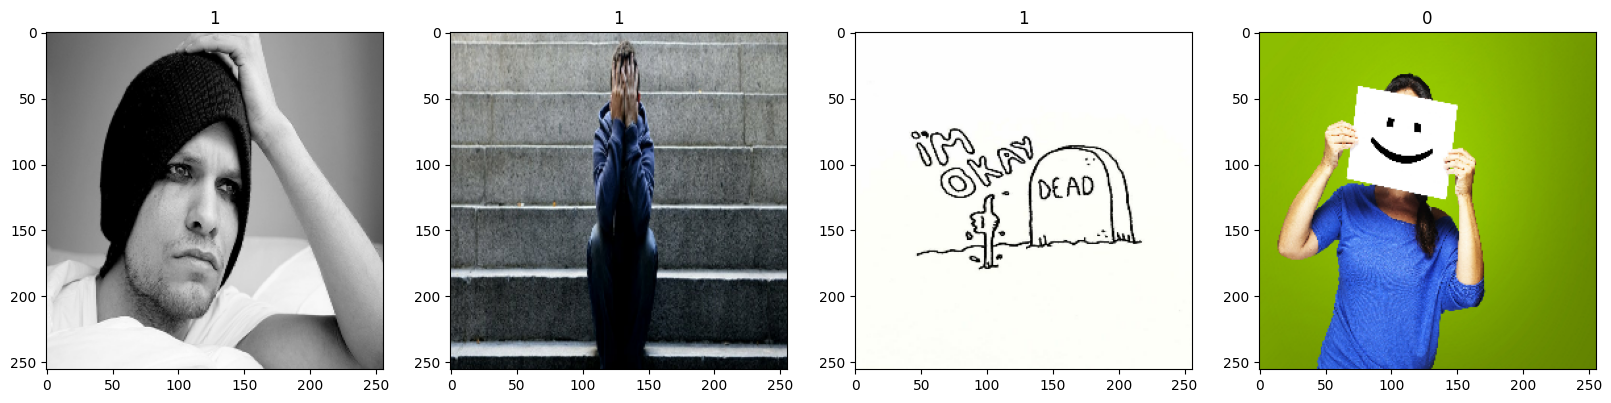

In [21]:
#lets check it out ---- from this we can see that 0 is happy, 1 is sad
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [22]:
#to repeat another batch , repeat the barch up


##    PART 2
### PREPROCESSING DATA:
    1. We scale our image values between 0 and 1 instead of 0 to 255. this helps for faster generation and good result
    2. to split it into trainig, validation and testing to avoid overfitting

### 2.1 Scale Data

In [23]:
data = data.map(lambda x,y: (x/255,y))  #the data.map allows us to perform the transormation in the pipeline.
#x will represnt our images, and that is our independent variable, while y is our target variable. so, the need to scale is our images which we will train. we are not transforming our y.

In [24]:
#lets create our iterator
scaled_iterator = data.as_numpy_iterator()

In [25]:
scaled_iterator.next()[0].max()

1.0

#### 2.2 Split Data

In [26]:
len(data)

6

In [27]:
train_size = int(len(data)*.7)  #for training------- this is 4*32 images for our training
val_size = int(len(data)*.2)  #to avaluate while training and for finetunning.------ this is 1*32 images for our validation
test_size = int(len(data)*.1)+1  #the model will not see this till evaluation stage, its post training ------ this is 1*32 images for our testing

In [28]:
train_size+test_size+val_size #

6

In [29]:
#what we are doing here is to determine which one would be training, validation, and test data. just like in Machine learning we assign siz=0.2, in CV we use take and skip. what does it mean?
#the train data takes the first four batches after suffling,
#the validation skips the first four batches picked by the training data,
#the testing data takes remianing after the training and the validation have taken theres.
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

## PART 3
### 3.1 Building the Deep Model

In [30]:
#import the dependencies 
#we have the sequentila API --- qucik and easy.
#we have the the functional API
from tensorflow.keras.models import Sequential  #this sequaltial API is good if you have your model flows from top to bottom. its if you have only one data input and one output, WHILE the functional API is good if you have multiple input and multiple output.
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten  #its a concolutional qnueral network. Maxpooling is like the condensing layer, it goes through the layer and condense it. the flatten flattens the conv which has channels and compresses it into a flat image.

In [31]:
#create  the instance of your sequantial class
model = Sequential() #we created the instance of Sequential class



### lets add in our layers ---- HERE COMES OUR DEEP NEURAL NETWORK
#####    This is where the magic happens

In [32]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))  #these first three are our concolution blocks. This first laye is for an input, it will have 16 filters and extraxts images, will be 3 px, px, and one move of srand. these are called " Architectural decisins. youcan change itif youw want.
""" 
every convolutional CV must have these:
explaination:
16: number of filters
3, 3 : the size of the filters 
1 : stride or the number of moves you want.
the power of neural netfwok is from the activations.
the activateion function helps to reshape the images intoo 0 and 1, and what the function looks like.
input shapes : we just pass it into our first layer.
"""
model.add(MaxPooling2D())
"""" 
it reduces our images based on half and condenses it down.
"""


model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())


model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())


model.add(Flatten())  #flatten layer

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  #single output because we have sigmoid activation



In [33]:
""" ANOTHER important part in our neural network is this"""
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
""" the adam = optimizer. there are many types of optimizer. to see them type: tf.optimmizer. 
     loss: we are using binarycrossentropy since is a binary classification
     metrics we wanto test is accuracy. this will tell us if its happy or sad
"""

' the adam = optimizer. there are many types of optimizer. to see them type: tf.optimmizer. \n     loss: we are using binarycrossentropy since is a binary classification\n     metrics we wanto test is accuracy. this will tell us if its happy or sad\n'

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

### 3.2 Train

In [35]:
logdir = r'C:\Users\test\OneDrive\Desktop\datascience_complete\DEEP-LEARNING\logs'

In [36]:
""" 
Call back is useful for debugging. 
we can use it to save our model at every particular checkpoint, for our tracking, 
we call as well use it for logging our activites
"""
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir) #sending it to our logs. we will use it to see our our model is doing.


In [37]:
#Lets fit our model.
"""IMPORT METHODS IN BUILDING OUR NN
1. fit: training component
2. predict: predictions 


the hist takes :
train: our trainig data
epochs: how long we are training for : 1 epoch is one run of our entire training set our data.
validation: after training bathces, we will see how our modell is performing in real time.
callbacks: we want to log all our activities.
"""
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])


Epoch 1/20
4/4 [==============================] - 4s 737ms/step - loss: 1.0032 - accuracy: 0.4609 - val_loss: 0.6924 - val_accuracy: 0.5000
Epoch 2/20
4/4 [==============================] - 3s 763ms/step - loss: 0.6877 - accuracy: 0.5859 - val_loss: 0.6577 - val_accuracy: 0.7188
Epoch 3/20
4/4 [==============================] - 3s 736ms/step - loss: 0.6471 - accuracy: 0.6484 - val_loss: 0.6140 - val_accuracy: 0.5938
Epoch 4/20
4/4 [==============================] - 4s 748ms/step - loss: 0.5824 - accuracy: 0.6250 - val_loss: 0.5489 - val_accuracy: 0.6875
Epoch 5/20
4/4 [==============================] - 4s 853ms/step - loss: 0.5347 - accuracy: 0.7500 - val_loss: 0.4392 - val_accuracy: 0.8750
Epoch 6/20
4/4 [==============================] - 4s 794ms/step - loss: 0.4811 - accuracy: 0.7578 - val_loss: 0.4077 - val_accuracy: 0.9062
Epoch 7/20
4/4 [==============================] - 4s 789ms/step - loss: 0.4548 - accuracy: 0.7812 - val_loss: 0.4536 - val_accuracy: 0.7812
Epoch 8/20
4/4 [====

In [38]:
"""To Visualize our history"""
hist.history


{'loss': [1.0031641721725464,
  0.6876957416534424,
  0.6470502018928528,
  0.5824182033538818,
  0.5346511006355286,
  0.4810798168182373,
  0.4548180401325226,
  0.3729552924633026,
  0.3421720266342163,
  0.2531207203865051,
  0.19677048921585083,
  0.1538359522819519,
  0.1366497427225113,
  0.12144635617733002,
  0.11747349798679352,
  0.10541076213121414,
  0.06427311897277832,
  0.0356428325176239,
  0.0320831798017025,
  0.03011181578040123],
 'accuracy': [0.4609375,
  0.5859375,
  0.6484375,
  0.625,
  0.75,
  0.7578125,
  0.78125,
  0.890625,
  0.84375,
  0.90625,
  0.96875,
  0.96875,
  0.953125,
  0.96875,
  0.9765625,
  0.9765625,
  0.9921875,
  1.0,
  1.0,
  0.984375],
 'val_loss': [0.6924005746841431,
  0.6576722860336304,
  0.6140252351760864,
  0.5488818883895874,
  0.4391763210296631,
  0.40771248936653137,
  0.4535757005214691,
  0.282622754573822,
  0.21003079414367676,
  0.2411535680294037,
  0.11324133723974228,
  0.12516698241233826,
  0.14954975247383118,
  0.13

#### 3.3 Plot performance

<function matplotlib.pyplot.show(close=None, block=None)>

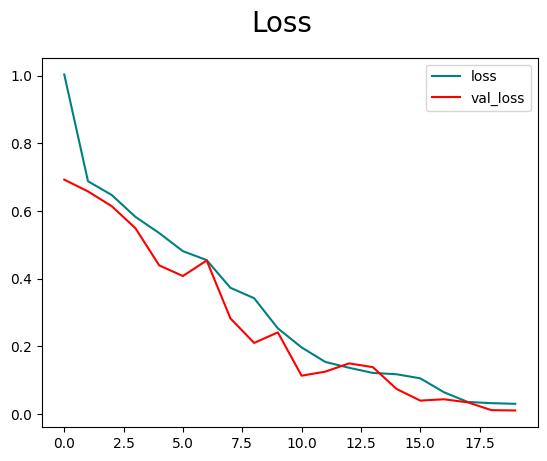

In [39]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='red', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper right')
plt.show



### observation:
    if your validation, is going up, it means overfitting and might need some regularization ormore data, 
    if the green is going up, that means you need its not able to learn, and mean we have bias problem
    


<function matplotlib.pyplot.show(close=None, block=None)>

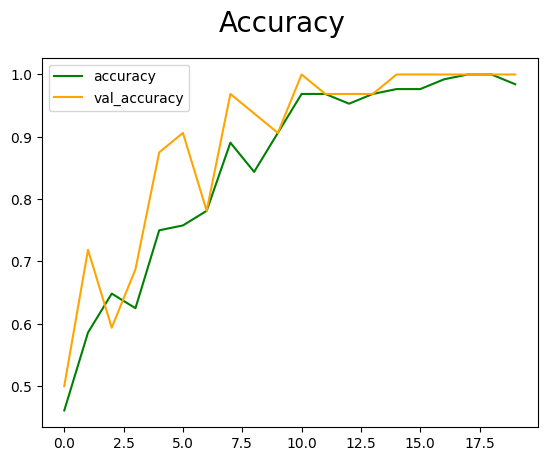

In [40]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='green', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show

### Observation:
    we can see that our accuracy is really doing well, as well as our validation accuracy.
    

## 4. Evaluation Performance

** we need to evaluate our oerformance on our testing data. remember we kept our testing data. we will also grab raw data from the web to test it.

*** during our testing, we will be checking for three things:

    - Precision
    - Recall
    - BinaryaCCURACY
These are what we usually use for our classification problem
    


#### 4.1 Evaluate

In [41]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [42]:
""" Instantiate the classes for you to use them"""

pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [43]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)  #how we make predictions, will return between 0 and 1
    pre.update_state(y, yhat) #to update our metrics
    re.update_state(y, yhat)
    acc.update_state(y, yhat)
    

1/1 [==============================] - 0s 244ms/step


In [44]:
print(f"precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}")

precision: 1.0, Recall: 1.0, Accuracy: 1.0


you can see they have the highest value they can take. since it has 0 to 1

### 4.2 TEST

we want to test our model with data from outside source that ou model has not seen  before

SO, we download an image from web. jpg preffered.

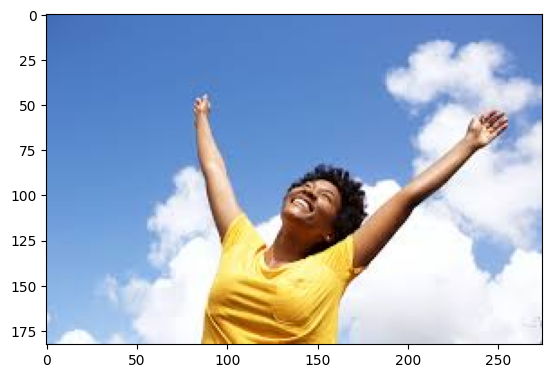

In [45]:
import cv2
img = cv2.imread(r"C:\Users\test\OneDrive\Desktop\datascience_complete\DEEP-LEARNING\raw data for testing\happiest.jpg")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

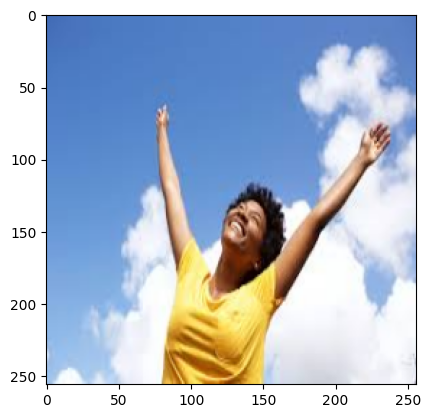

In [46]:
""" when you look at this image, you will sewe that its above our 255 px  by 255 px, so we nee to resize"""
resize = tf.image.resize(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [47]:
""" Lets now test our model"""
yhat = model.predict(np.expand_dims(resize/255,0))  #we resize it by scaling to 1 using /255

1/1 [==============================] - 0s 32ms/step


In [48]:
""" 
Lets now see our answer
now you can see that its happy. in our binary classification, from 50 percent below is happy, while  above 50 % is sad
"""

yhat

array([[0.25300035]], dtype=float32)

In [49]:
if yhat > 0.5:
    print(f"The predicted class is sad")
else:
    print(f"the predicted class is happy")

the predicted class is happy


## PART 5

### 5.1 Save the model.

In [50]:
from tensorflow.keras.models import load_model

In [51]:
""" 
save the  mode first.
you use the h5 to serialize it, that means you zipping it
"""

model.save(os.path.join(r'C:\Users\test\OneDrive\Desktop\datascience_complete\DEEP-LEARNING\model', 'happysadmodel.h5'))

In [52]:
"""
reload our model

"""

new_model = load_model(os.path.join(r'C:\Users\test\OneDrive\Desktop\datascience_complete\DEEP-LEARNING\model', 'happysadmodel.h5'))

In [53]:
yhatnew = new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 89ms/step


In [54]:
if yhat > 0.5:
    print(f"The predicted class is sad")
else:
    print(f"the predicted class is happy")

the predicted class is happy
